# Explore data

The dataset is downloaded from NASA's Prognostics Data Repository at https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/. The exact download link was https://ti.arc.nasa.gov/c/8/. Citation for the dataset is:
```
B. Morton. Sentient Corporation. "Trebuchet Data Set", NASA Ames Prognostics Data Repository (http://ti.arc.nasa.gov/project/prognostic-data-repository), NASA Ames Research Center, Moffett Field, CA
```

There are 3 folders w/ the following structure:
+ `2008_07_28`: Image of the toy trebuchet
+ `NASA Deliverables`: 
    + **30 `.mat` files**, `ExampleCode_NASA.m` and `PlotAllTrajectories.m`.
    + `TESTING README.txt`
+ `TT3`: Video of trebuchet launches

The `.mat` files in the`NASA Deliverables` folder contains the frames extracted from the `TT3` folder. The frames have been edited to exclude still frames and the trebuchet blacked out to avoid confusing the model. 

`TESTING README.txt` describes the experiment setup, which is good information.

I should only need to work w/ the `.mat` files, bolded above.

In [49]:
import os
from scipy.io import loadmat
from einops import rearrange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
wd = 'data/raw/NASA Deliverables/'

In [ ]:
!mkdir data/processed

## Explore one file

In [6]:
one_file_data = loadmat(wd + 'TT3-W1-Super1_NASA.mat')

In [7]:
one_file_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trajectory', 'images'])

There's `trajectory` and `images`.

#### Trajectory

In [8]:
one_file_data['trajectory'].dtype

dtype([('measured', 'O'), ('optimal', 'O'), ('time', 'O'), ('N_valid', 'O')])

Contains named numpy arrays, `measured`, `optimal`, `time` and `N_valid`. 

In [9]:
one_file_data['trajectory']['measured'][0, 0]['x'][0, 0].ravel()

array([586, 568, 549, 531, 514, 496, 479, 462, 445, 428, 413, 395, 379,
       363, 347, 331, 314, 299, 282, 266, 251, 239, 232, 225, 217, 211,
       204, 196, 189, 182, 176, 169, 163, 156, 149, 142, 135, 128, 121,
       114, 108, 101,  94,  88,  81,  74,  68,  59,  51,  43,  35,  26,
        18,  10,   5], dtype=uint16)

In [10]:
one_file_data['trajectory']['measured'][0, 0]['y'][0, 0].ravel()

array([102,  96,  91,  88,  86,  86,  88,  90,  94, 100, 107, 115, 124,
       135, 148, 162, 177, 194, 212, 231, 253, 258, 241, 226, 212, 200,
       188, 178, 170, 164, 159, 155, 153, 152, 152, 153, 156, 161, 167,
       175, 184, 194, 206, 219, 234, 251, 267, 263, 257, 253, 249, 247,
       247, 248, 250], dtype=uint16)

The indexing here is numpy arrays wrapped in object numpy arrays.

In [11]:
one_file_data['trajectory']['optimal'][0, 0]['x'][0, 0].ravel()

array([584.97998984, 566.98691692, 549.13414012, 531.42476956,
       513.86121564, 496.44504479, 479.17686796, 462.05627901,
       445.08185381, 428.25121143, 411.56112844, 395.00768989,
       378.58645734, 362.29263584, 346.12122615, 330.06715412,
       314.125374  , 298.29094648, 282.55909402, 266.92523739,
       251.38501728])

In [12]:
one_file_data['trajectory']['optimal'][0, 0]['y'][0, 0].ravel()

array([101.49437527,  95.4503604 ,  90.89569143,  87.81982815,
        86.21151047,  86.05890818,  87.34982197,  90.07192191,
        94.21300177,  99.76122372, 106.7053296 , 115.03480228,
       124.73996999, 135.81205539, 148.24317805, 162.02632144,
       177.1552765 , 193.62457189, 211.4293989 , 230.56553659,
       251.02928073])

In [13]:
one_file_data['trajectory']['time'][0, 0].ravel()

array([0.       , 0.0333333, 0.0666666, 0.0999999, 0.1333332, 0.1666665,
       0.1999998, 0.2333331, 0.2666664, 0.2999997, 0.333333 , 0.3666663,
       0.3999996, 0.4333329, 0.4666662, 0.4999995, 0.5333328, 0.5666661,
       0.5999994, 0.6333327, 0.666666 , 0.6999993, 0.7333326, 0.7666659,
       0.7999992, 0.8333325, 0.8666658, 0.8999991, 0.9333324, 0.9666657,
       0.999999 , 1.0333323, 1.0666656, 1.0999989, 1.1333322, 1.1666655,
       1.1999988, 1.2333321, 1.2666654, 1.2999987, 1.333332 , 1.3666653,
       1.3999986, 1.4333319, 1.4666652, 1.4999985, 1.5333318, 1.5666651,
       1.5999984, 1.6333317, 1.666665 , 1.6999983, 1.7333316, 1.7666649,
       1.7999982])

In [14]:
one_file_data['trajectory']['N_valid'][0, 0][0, 0]

21

#### Images

In [127]:
one_file_data['images'].dtype

dtype([('actual', 'O'), ('detection', 'O')])

Named arrays `actual` and `detection`.

In [133]:
# 4D array of actual frames from the video
one_file_data['images'][0, 0]['actual'].shape

(279, 599, 3, 38)

Given the image size, most likely the trajectory info recorded above are image coordinates. They should be normalized 0-1 later as prediction labels.

In [107]:
# Color stored as ints of 0 to 255
one_file_data['images'][0, 0]['actual'].dtype

dtype('uint8')

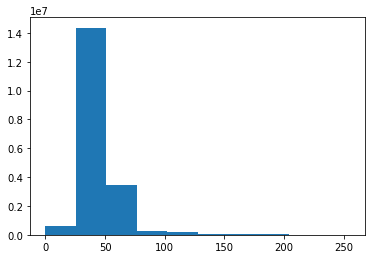

In [106]:
plt.hist(one_file_data['images'][0, 0]['actual'].reshape(-1))
plt.show()

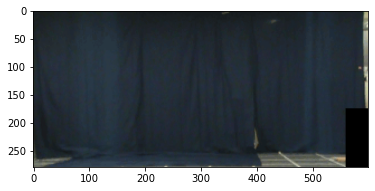

In [16]:
plt.imshow(one_file_data['images'][0, 0]['actual'][:, :, :, 0])

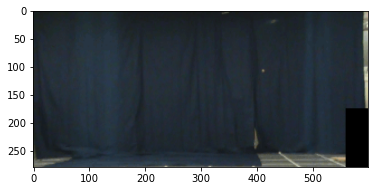

In [17]:
plt.imshow(one_file_data['images'][0, 0]['actual'][:, :, :, 10])

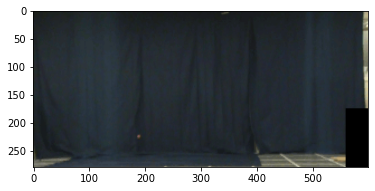

In [102]:
plt.imshow(one_file_data['images'][0, 0]['actual'][:, :, :, 20])

From the coords, looks like each `.mat` file stores data with shape (y, x, RGB channels, frame number).

In [134]:
# 3D array of change detection frames
one_file_data['images'][0, 0]['detection'].shape

(279, 599, 38)

In [139]:
one_file_data['images'][0, 0]['detection'].min(), one_file_data['images'][0, 0]['detection'].max()

(0, 90)

In [140]:
one_file_data['images'][0, 0]['detection'].dtype

dtype('uint8')

Most likely these are in units of change in 0-255 RGB values? `data/raw/NASA Deliverables/TESTING README.txt` explains that these values are obtained using change detection, but didn't elaborate further.

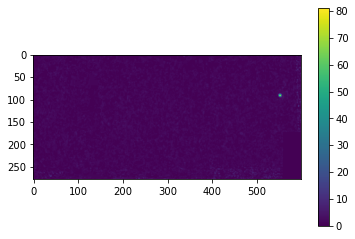

In [98]:
plt.imshow(one_file_data['images'][0, 0]['detection'][:, :, 1])
plt.colorbar()
plt.show()

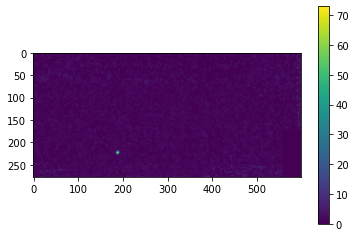

In [100]:
plt.imshow(one_file_data['images'][0, 0]['detection'][:, :, 20])
plt.colorbar()
plt.show()

## Extract all data

In [22]:
trajectories = {}
image_frames = {}
change_frames = {}

In [154]:
for i in os.listdir(wd):
    if i.split('.')[-1] != 'mat':
        continue
    print(wd + i)
    # Load data
    one_file_data = loadmat(wd + i)
    
    # Store N_valid data points
    # Mmm don't need this actually
    # nvalid = one_file_data['trajectory']['N_valid'][0, 0][0, 0]
    
    # Load trajectory data
    meas_x = one_file_data['trajectory']['measured'][0, 0]['x'][0, 0].ravel()
    meas_y = one_file_data['trajectory']['measured'][0, 0]['y'][0, 0].ravel()
    opt_x = one_file_data['trajectory']['optimal'][0, 0]['x'][0, 0].ravel()
    opt_y = one_file_data['trajectory']['optimal'][0, 0]['y'][0, 0].ravel()

    # Find non-valid data points
    nan_pad_count = meas_x.shape[0] - opt_x.shape[0]
    
    # Store trajectory data
    trajectories[i] = pd.DataFrame(
        index=one_file_data['trajectory']['time'][0, 0].ravel(),
        data={
            'meas_x': meas_x,
            'meas_y': meas_y,
            'opt_x': np.concatenate([opt_x, np.array(nan_pad_count*[np.nan])], axis=0),
            'opt_y': np.concatenate([opt_y, np.array(nan_pad_count*[np.nan])], axis=0)
        }
    )
    
    # Pad image frames by extending the edge
    # Change h, w from 279, 599 -> 280, 600
    image_frame = one_file_data['images'][0, 0]['actual']
    image_frame = np.pad(image_frame, pad_width=[(0, 1), (0, 1), (0, 0), (0, 0)], mode="edge")
    
    # Store image frames
    image_frames[i] = image_frame 
    
    # Pad change frames
    change_frame = one_file_data['images'][0, 0]['detection']
    change_frame = np.pad(change_frame, pad_width=[(0, 1), (0, 1), (0, 0)], mode="edge")
    
    # Store change frames
    # Might or might not use this down the line
    change_frames[i] = change_frame

data/raw/NASA Deliverables/TT3-W1-Super3_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Super1_NASA.mat
data/raw/NASA Deliverables/TT3-W3-Super4_NASA.mat
data/raw/NASA Deliverables/TT3-W3-Foos5_NASA.mat
data/raw/NASA Deliverables/TT3-W3-Foos4_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Foos4_NASA.mat
data/raw/NASA Deliverables/TT3-W2-Super3_NASA.mat
data/raw/NASA Deliverables/TT3-W2-Foos5_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Super4_NASA.mat
data/raw/NASA Deliverables/TT3-W2-Foos3_NASA.mat
data/raw/NASA Deliverables/TT3-W2-Foos1_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Super5_NASA.mat
data/raw/NASA Deliverables/TT3-W3-Super5_NASA.mat
data/raw/NASA Deliverables/TT3-W3-Foos3_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Foos1_NASA.mat
data/raw/NASA Deliverables/TT3-W2-Super4_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Foos3_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Foos2_NASA.mat
data/raw/NASA Deliverables/TT3-W3-Foos2_NASA.mat
data/raw/NASA Deliverables/TT3-W1-Foos5_NASA.mat
data/raw/NAS

In [24]:
fnames = list(trajectories.keys())

In [25]:
trajectories[fnames[0]].head()

,meas_x,meas_y,opt_x,opt_y
0.000000,592,102,592.744690,103.182224
0.033333,575,96,574.803875,95.841986
0.066667,557,90,557.000038,90.000011
0.100000,539,86,539.336824,85.646397
0.133333,521,83,521.817309,82.770422


In [26]:
image_frames[fnames[0]].shape

(279, 599, 3, 48)

Done extracting!

## DOE in data

Some DOE has been done in collecting this data. 

2 X 3 test matrix, 5 trials each.
+ Projectile: Super Ball or Foosball
+ Counter weight: Weight 1, Weight 2, Weight 3

Drag and gravity are constant (pretty much) so the differences between each run are initial velocity at release and angle of release. The trebuchet has a simple sling, hence there is a fair amount of variation.

## Data summary

Extracted the immediately useful parts of the dataset into three dictionaries:
+ trajectories: dictionary of dataframes, containing ball location per timestep
+ image_frames: dictionary of images, containing sequences of RGB images with size (height, width, 3, n_timesteps)
+ change_frames: dictionary of images, containing sequences of change detection masks with size (height, width, n_timesteps)

All three are keyed by the original `.mat` file names. 

In [27]:
for count, (i, j) in enumerate(trajectories.items()):
    print(i, j.shape, type(j))
    if count == 5:
        break

TT3-W1-Super3_NASA.mat (48, 4) <class 'pandas.core.frame.DataFrame'>
TT3-W1-Super1_NASA.mat (55, 4) <class 'pandas.core.frame.DataFrame'>
TT3-W3-Super4_NASA.mat (34, 4) <class 'pandas.core.frame.DataFrame'>
TT3-W3-Foos5_NASA.mat (39, 4) <class 'pandas.core.frame.DataFrame'>
TT3-W3-Foos4_NASA.mat (37, 4) <class 'pandas.core.frame.DataFrame'>
TT3-W1-Foos4_NASA.mat (37, 4) <class 'pandas.core.frame.DataFrame'>


In [28]:
for count, (i, j) in enumerate(image_frames.items()):
    print(i, j.shape, type(j))
    if count == 5:
        break

TT3-W1-Super3_NASA.mat (279, 599, 3, 48) <class 'numpy.ndarray'>
TT3-W1-Super1_NASA.mat (279, 599, 3, 55) <class 'numpy.ndarray'>
TT3-W3-Super4_NASA.mat (279, 599, 3, 34) <class 'numpy.ndarray'>
TT3-W3-Foos5_NASA.mat (279, 599, 3, 39) <class 'numpy.ndarray'>
TT3-W3-Foos4_NASA.mat (279, 599, 3, 37) <class 'numpy.ndarray'>
TT3-W1-Foos4_NASA.mat (279, 599, 3, 37) <class 'numpy.ndarray'>


In [29]:
for count, (i, j) in enumerate(change_frames.items()):
    print(i, j.shape, type(j))
    if count == 5:
        break

TT3-W1-Super3_NASA.mat (279, 599, 48) <class 'numpy.ndarray'>
TT3-W1-Super1_NASA.mat (279, 599, 55) <class 'numpy.ndarray'>
TT3-W3-Super4_NASA.mat (279, 599, 34) <class 'numpy.ndarray'>
TT3-W3-Foos5_NASA.mat (279, 599, 39) <class 'numpy.ndarray'>
TT3-W3-Foos4_NASA.mat (279, 599, 37) <class 'numpy.ndarray'>
TT3-W1-Foos4_NASA.mat (279, 599, 37) <class 'numpy.ndarray'>


In [30]:
import pickle

In [31]:
import sys
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) \n[GCC 9.4.0]'

In [32]:
with open('data/processed/trajectories.pkl', 'wb') as f:
    pickle.dump(trajectories, f)
    
with open('data/processed/image_frames.pkl', 'wb') as f:
    pickle.dump(image_frames, f)
    
with open('data/processed/change_frames.pkl', 'wb') as f:
    pickle.dump(change_frames, f)

## Preprocess data for ML

Further package this data into arrays for training and validation. 

### Preprocess one

In [33]:
sample_label = trajectories['TT3-W1-Super1_NASA.mat'][['opt_x', 'opt_y']].dropna(subset=['opt_x', 'opt_y'])

In [34]:
sample_label.tail()

,opt_x,opt_y
0.533333,314.125374,177.155276
0.566666,298.290946,193.624572
0.599999,282.559094,211.429399
0.633333,266.925237,230.565537
0.666666,251.385017,251.029281


In [35]:
sample_frames = change_frames['TT3-W1-Super1_NASA.mat'][:, :, :len(sample_label)]

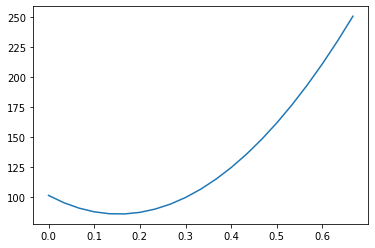

In [36]:
plt.plot(sample_label.index, sample_label['opt_y'])

y-axis in the image has 0 at the top and increases downwards, hence the parabola when plotted in w/ default settings is inverted.

In [37]:
np.unique(sample_frames[:, :, 19].ravel())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 25, 27, 28, 29, 34, 35, 36, 37, 39, 40, 42, 45, 48, 50,
       54, 57, 63, 64, 71], dtype=uint8)

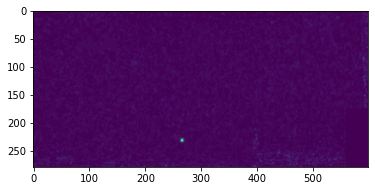

In [38]:
plt.imshow(sample_frames[:, :, 19])

In [39]:
for i in trajectories.keys():
    sample_label = trajectories[i][['opt_x', 'opt_y']].dropna(subset=['opt_x', 'opt_y'])
    print(i, len(sample_label))
    print(sample_label.index[:5])

TT3-W1-Super3_NASA.mat 22
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W1-Super1_NASA.mat 21
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W3-Super4_NASA.mat 22
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W3-Foos5_NASA.mat 23
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W3-Foos4_NASA.mat 22
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W1-Foos4_NASA.mat 21
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W2-Super3_NASA.mat 22
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W2-Foos5_NASA.mat 23
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W1-Super4_NASA.mat 22
Float64Index([0.0, 0.0333333, 0.0666666, 0.0999999, 0.1333332], dtype='float64')
TT3-W2-Foos3_NASA.mat 25
Float64Index([0.

Same time deltas, and approximately same amount of time steps. I can safely cut each time series at 20 data points. This will allow me to compute the physics-driven loss function as long as I implement training in multiples of 20.

In [40]:
len(trajectories.keys())

30

## Preprocess all

Save some for validation.

In [41]:
keys = list(trajectories.keys())

In [42]:
random_val_keys = list(np.random.choice(keys, 4))
print(random_val_keys)

['TT3-W3-Foos5_NASA.mat', 'TT3-W1-Foos3_NASA.mat', 'TT3-W3-Super4_NASA.mat', 'TT3-W1-Foos4_NASA.mat']


In [167]:
list_of_change_train = []
list_of_change_test = []
list_of_image_train = []
list_of_image_test = []

list_of_label_train = []
list_of_label_test = []

for i in trajectories.keys():
    # Only pick up first 20 timesteps
    sample_label = trajectories[i][['opt_x', 'opt_y']].iloc[:20, :].copy()
    sample_change_frames = change_frames[i][..., :20]
    sample_image_frames = image_frames[i][..., :20]
    
    # Label needs to be divided by the image height and width
    sample_label["opt_x"] = sample_label["opt_x"] / 600
    sample_label["opt_y"] = sample_label["opt_y"] / 280
    
    if i in random_val_keys:
        list_of_change_test.append(sample_change_frames)
        list_of_image_test.append(sample_image_frames)
        list_of_label_test.append(sample_label.values)
    else:
        list_of_change_train.append(sample_change_frames)
        list_of_image_train.append(sample_image_frames)
        list_of_label_train.append(sample_label.values)

In [168]:
change_train = np.concatenate(list_of_change_train, axis=2)
change_test = np.concatenate(list_of_change_test, axis=2)

In [169]:
label_train = np.concatenate(list_of_label_train, axis=0)
label_test = np.concatenate(list_of_label_test, axis=0)

In [170]:
image_train = np.concatenate(list_of_image_train, axis=3)
image_test = np.concatenate(list_of_image_test, axis=3)

In [171]:
print(image_train.shape, change_train.shape, label_train.shape)
print(image_test.shape, change_test.shape, label_test.shape)

(280, 600, 3, 520) (280, 600, 520) (520, 2)
(280, 600, 3, 80) (280, 600, 80) (80, 2)


In [172]:
# Convert to torch NCHW tensor format
image_train = rearrange(image_train, "h w c n -> n c h w")
image_test = rearrange(image_test, "h w c n -> n c h w")

change_train = rearrange(change_train, "h w n -> n 1 h w")
change_test = rearrange(change_test, "h w n -> n 1 h w")

In [173]:
print(image_train.shape, change_train.shape, label_train.shape)
print(image_test.shape, change_test.shape,  label_test.shape)

(520, 3, 280, 600) (520, 1, 280, 600) (520, 2)
(80, 3, 280, 600) (80, 1, 280, 600) (80, 2)


Perfect.

In [174]:
np.save('data/processed/image_train.npy', image_train, allow_pickle=False)
np.save('data/processed/image_test.npy', image_test, allow_pickle=False)

np.save('data/processed/change_train.npy', change_train, allow_pickle=False)
np.save('data/processed/change_test.npy', change_test, allow_pickle=False)

np.save('data/processed/label_train.npy', label_train, allow_pickle=False)
np.save('data/processed/label_test.npy', label_test, allow_pickle=False)